In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
filepath = "/mnt/data-storage/yaguangli2023/stellar-models/grid_models_surface_effect_uncorrected/test.h5"
test_data = pd.read_hdf(filepath, "stars")
test_data = test_data.reset_index()
test_data.head()

,index,track,star,star_mass,Yinit,Zinit,amlt,fov_core,fov_shell,star_age,...,log_Teff,log_radius,log_Dnu_freq_o,log_star_mass,log_g,log_L,delta_X,f_nuc,phase,EEP
0,7,7000,8,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,5.405171e+07,...,3.804184,-0.046485,2.168433,-0.034662,4.496376,0.078459,0.003644,1.000889,0,0.001982
1,22,7000,23,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,7.720014e+08,...,3.806648,-0.032545,2.146368,-0.034662,4.468495,0.116195,0.079764,0.999808,0,0.022920
2,24,7000,25,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,8.675000e+08,...,3.807014,-0.030930,2.143763,-0.034662,4.465266,0.120890,0.090904,0.999808,0,0.025527
3,25,7000,26,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,9.247991e+08,...,3.807235,-0.029954,2.142189,-0.034662,4.463313,0.123724,0.097724,0.999807,0,0.027101
4,30,7000,31,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,1.184983e+09,...,3.808238,-0.025440,2.134920,-0.034662,4.454285,0.136767,0.129670,0.999808,0,0.034342


In [3]:
rename_cols = {
    "EEP": "evol",
    "log_star_mass": "log_mass",
    "star_mass": "mass",
    "Zinit": "Z",
    "Yinit": "Y",
    "amlt": "a_MLT",
    "log_Dnu_freq_o": "log_Dnu",
    "Dnu_freq_o": "Dnu",
    "radius": "R",
    "log_radius": "log_R"
}
test_data = test_data.rename(columns=rename_cols)
test_data.head()

,index,track,star,mass,Y,Z,a_MLT,fov_core,fov_shell,star_age,...,log_Teff,log_R,log_Dnu,log_mass,log_g,log_L,delta_X,f_nuc,phase,evol
0,7,7000,8,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,5.405171e+07,...,3.804184,-0.046485,2.168433,-0.034662,4.496376,0.078459,0.003644,1.000889,0,0.001982
1,22,7000,23,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,7.720014e+08,...,3.806648,-0.032545,2.146368,-0.034662,4.468495,0.116195,0.079764,0.999808,0,0.022920
2,24,7000,25,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,8.675000e+08,...,3.807014,-0.030930,2.143763,-0.034662,4.465266,0.120890,0.090904,0.999808,0,0.025527
3,25,7000,26,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,9.247991e+08,...,3.807235,-0.029954,2.142189,-0.034662,4.463313,0.123724,0.097724,0.999807,0,0.027101
4,30,7000,31,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,1.184983e+09,...,3.808238,-0.025440,2.134920,-0.034662,4.454285,0.136767,0.129670,0.999808,0,0.034342


In [4]:
test_data["Av"] = 0.0
test_data["distance"] = 10.0

In [5]:
from celestify.star import Star, StarBase, BolometricCorrections

2024-01-30 14:50:01.595363: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 14:50:01.612279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 14:50:01.612297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 14:50:01.613073: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 14:50:01.616529: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 14:50:01.616913: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [6]:
bands = ["G", "BP", "RP"]
bolometric_corrections = BolometricCorrections(bands=bands)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [7]:
bc_inputs = ["Teff", "log_g", "M_H", "Av"]
x = test_data[bc_inputs].to_numpy()
test_bcs = bolometric_corrections.interpolate(x)

In [8]:
test_data["bol_mag"] = bol_mag = StarBase.bol_mag_sun - 2.5 * test_data["log_L"]
test_data[[f"abs_{band}" for band in bands]] = abs_mag = bol_mag.to_numpy()[:, None] - test_bcs

In [9]:
star = Star(bands)

2024-01-30 14:50:07.718082: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
from jax import vmap

In [11]:
param_names = ["evol", "log_mass", "M_H", "Y", "a_MLT", "Av", "distance"]
params = test_data[param_names].to_dict(orient="list")
params = {key: np.array(value) for key, value in params.items()}

In [12]:
determs = vmap(star)(params)

In [13]:
abs_mag = determs.pop("abs_mag")
mag = determs.pop("mag")

for i, band in enumerate(bands):
    determs[f"abs_{band}"] = abs_mag[:, i]
    determs[band] = mag[:, i]

In [14]:
pred = pd.DataFrame.from_dict(determs, orient="columns")
pred.head()

,BP_RP,Dnu,G,R,Teff,age,bol_mag,log_Dnu,log_L,log_R,...,log_g,log_numax,mass,numax,plx,abs_G,abs_BP,BP,abs_RP,RP
0,0.597681,147.700943,4.510411,0.896195,6422.582520,0.053700,4.524154,2.169383,0.090338,-0.047598,...,4.498600,3.527300,0.92329,3367.438232,100.0,4.510412,4.727942,4.727941,4.130261,4.130260
1,0.593238,139.688965,4.420040,0.929590,6438.464844,0.750919,4.433982,2.145162,0.126407,-0.031708,...,4.466823,3.494986,0.92329,3125.979004,100.0,4.420041,4.635736,4.635736,4.042498,4.042497
2,0.591616,139.082016,4.410593,0.931834,6444.904785,0.854232,4.424405,2.143271,0.130238,-0.030661,...,4.464728,3.492675,0.92329,3109.385742,100.0,4.410594,4.625584,4.625584,4.033968,4.033967
3,0.590992,138.541183,4.404019,0.933975,6447.300293,0.912275,4.417809,2.141579,0.132877,-0.029665,...,4.462735,3.490601,0.92329,3094.572021,100.0,4.404020,4.618744,4.618743,4.027751,4.027751
4,0.589355,136.467148,4.380936,0.942169,6453.419434,1.171658,4.394721,2.135028,0.142112,-0.025871,...,4.455148,3.482807,0.92329,3039.535156,100.0,4.380937,4.594970,4.594970,4.005615,4.005615


In [15]:
test_data["L"] = 10**test_data["log_L"]
pred["L"] = 10**pred["log_L"]

In [16]:
error = (test_data - pred).dropna(axis=1)

In [17]:
error.describe()

,Dnu,L,R,Teff,abs_BP,abs_G,abs_RP,bol_mag,log_Dnu,log_L,log_R,log_Teff,log_g,mass
count,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06
mean,2.829118e-02,-3.995686e-02,-2.936682e-03,-9.830363e-01,2.672699e-03,2.411220e-03,2.220903e-03,2.114508e-03,1.484631e-04,-8.458033e-04,-2.455274e-04,-8.841973e-05,4.912458e-04,-5.488168e-10
std,2.782974e-01,4.053613e-01,3.189881e-02,1.723132e+01,1.321906e-02,1.151899e-02,1.017864e-02,1.086781e-02,2.769434e-03,4.347122e-03,1.945523e-03,1.092561e-03,3.891046e-03,5.384289e-08
min,-5.806670e+00,-3.665578e+01,-2.457777e+00,-1.826985e+02,-1.678264e-01,-1.478935e-01,-1.537994e-01,-1.594498e-01,-6.136623e-02,-8.946749e-02,-6.569117e-02,-1.515821e-02,-7.936350e-02,-1.858521e-07
25%,-8.147182e-02,-1.233968e-01,-8.904691e-03,-1.124638e+01,-4.625320e-03,-4.089490e-03,-3.509670e-03,-4.366612e-03,-1.283403e-03,-3.182289e-03,-1.331058e-03,-7.469493e-04,-1.670514e-03,-3.257751e-08
50%,9.676156e-03,-9.917443e-03,-1.348966e-03,-1.264300e+00,1.537383e-03,1.480430e-03,1.427174e-03,1.548586e-03,1.898198e-04,-6.194322e-04,-2.499022e-04,-8.387907e-05,5.000068e-04,-2.288818e-10
75%,1.113405e-01,7.685286e-02,5.230556e-03,9.022647e+00,8.684635e-03,7.824153e-03,7.005453e-03,7.955695e-03,1.647307e-03,1.746648e-03,8.353496e-04,5.814038e-04,2.662260e-03,3.170013e-08
max,1.002372e+01,2.377974e+01,1.321721e+00,1.421455e+02,3.014145e-01,2.071858e-01,2.307315e-01,2.236687e-01,1.036571e-01,6.377987e-02,3.968188e-02,1.096157e-02,1.313825e-01,1.802826e-07


In [18]:
error.quantile([.16, .5, .84])

,Dnu,L,R,Teff,abs_BP,abs_G,abs_RP,bol_mag,log_Dnu,log_L,log_R,log_Teff,log_g,mass
0.16,-0.148743,-0.224876,-0.014465,-16.395898,-0.007771,-0.006863,-0.005973,-0.007231,-0.002043,-0.004608,-0.001880,-0.001081,-0.002778,-4.833221e-08
0.50,0.009676,-0.009917,-0.001349,-1.264300,0.001537,0.001480,0.001427,0.001549,0.000190,-0.000619,-0.000250,-0.000084,0.000500,-2.288818e-10
0.84,0.197531,0.159836,0.009663,14.474955,0.013243,0.011760,0.010371,0.011520,0.002388,0.002892,0.001389,0.000912,0.003761,4.875183e-08


In [28]:
from scipy.stats import median_abs_deviation

In [29]:
median_abs_deviation(error.L)

0.09969741558715928

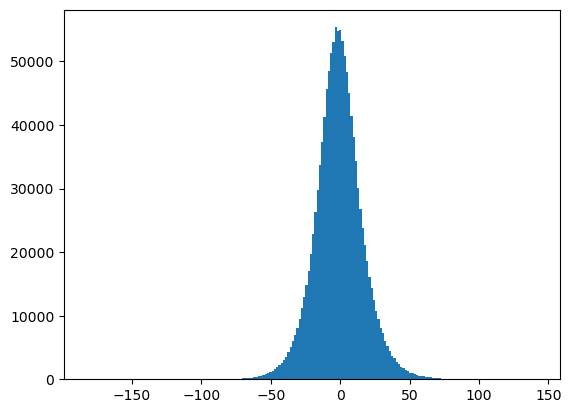

In [19]:
fig, ax = plt.subplots()

ax.hist(error.Teff, bins=200);

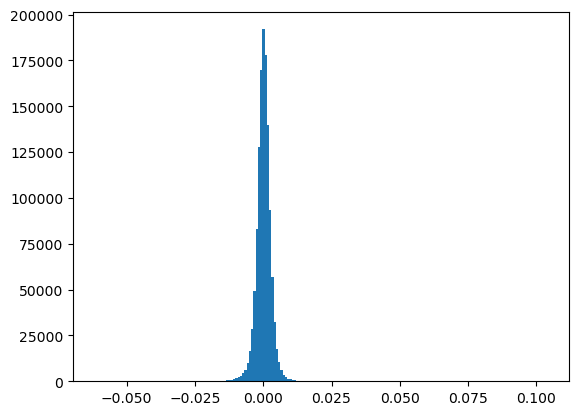

In [26]:
fig, ax = plt.subplots()

ax.hist(error.log_Dnu, bins=200);

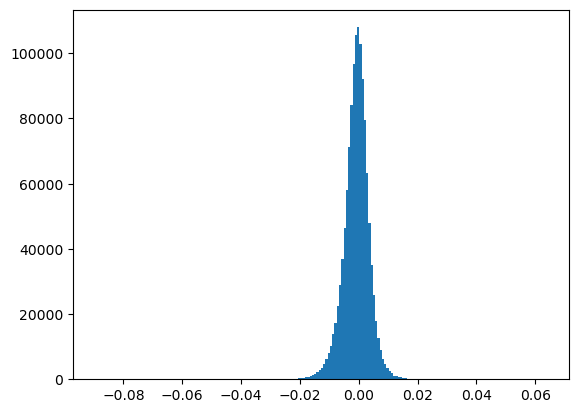

In [25]:
fig, ax = plt.subplots()

ax.hist(error.log_L, bins=200);

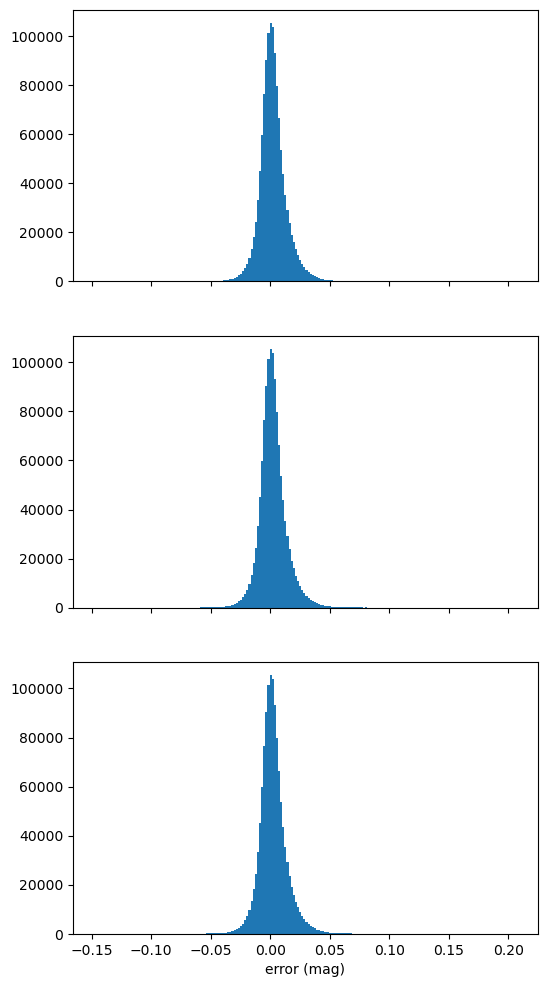

In [27]:
fig, axes = plt.subplots(len(bands), figsize=(6.0, 4.0*len(bands)), sharex=True)

for i, band in enumerate(bands):
    axes[i].hist(error.abs_G, bins=200)
axes[i].set_xlabel("error (mag)");